# Autoencoder for Recommendation Systems
---

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [7]:
ratings_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
movies_columns = ['MovieID', 'Title', 'Genres']
ratings = pd.read_csv('../data/recommendation_system/movie_lens/ratings.dat', sep='::', names=ratings_columns)
movies = pd.read_csv('../data/recommendation_system/movie_lens/movies.dat', sep='::', names=movies_columns)

/Users/bruno.guimaraes/.virtualenvs/NeuralNetworks_Course/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [10]:
ratings.shape

(10000054, 4)

In [14]:
data = pd.pivot_table(
    data=ratings,
    columns='MovieID',
    index='UserID',
    values='Rating'
)

In [15]:
data.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.shape

(69878, 10677)

In [17]:
def sparsity_calculation(data):
    data = np.nan_to_num(data)
    return round(1. - np.count_nonzero(data) / data.size, 3) * 100

In [18]:
sparsity_calculation(data)

98.7

In [19]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [20]:
data_scaled = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns).fillna(0)

In [21]:
data_scaled.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.111111,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
model = tf.keras.Sequential([
    #encoder
    tf.keras.layers.Dense(units=512, activation='relu', name='enc_1', input_dim=data_scaled.shape[1]),
    tf.keras.layers.BatchNormalization(name='batch_1'),
    tf.keras.layers.Dropout(0.5, name='drop_1'),
    tf.keras.layers.Dense(units=256, activation='relu', name='enc_2'),
    tf.keras.layers.BatchNormalization(name='batch_2'),
    tf.keras.layers.Dropout(0.5, name='drop_2'),

    #bottleneck
    tf.keras.layers.Dense(units=128, activation='linear', name='embeddings'),

    #decoder
    tf.keras.layers.Dense(units=256, activation='relu', name='dec_1'),
    tf.keras.layers.BatchNormalization(name='batch_3'),
    tf.keras.layers.Dropout(0.5, name='drop_3'),
    tf.keras.layers.Dense(units=512, activation='relu', name='dec_2'),
    tf.keras.layers.BatchNormalization(name='batch_4'),
    tf.keras.layers.Dropout(0.5, name='drop_4'),
    tf.keras.layers.Dense(units=data_scaled.shape[1], activation='linear', name='user_rating_pred')
])

2021-11-18 19:55:30.096288: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 enc_1 (Dense)               (None, 512)               5467136   
                                                                 
 batch_1 (BatchNormalization  (None, 512)              2048      
 )                                                               
                                                                 
 drop_1 (Dropout)            (None, 512)               0         
                                                                 
 enc_2 (Dense)               (None, 256)               131328    
                                                                 
 batch_2 (BatchNormalization  (None, 256)              1024      
 )                                                               
                                                                 
 drop_2 (Dropout)            (None, 256)               0

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto', verbose=1)

In [27]:
history = model.fit(
    data_scaled,
    data_scaled,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[callback]
)

Epoch 1/50
437/437 [==============================] - 55s 123ms/step - loss: 0.0706 - val_loss: 0.0066
Epoch 2/50
437/437 [==============================] - 44s 100ms/step - loss: 0.0146 - val_loss: 0.0054
Epoch 3/50
437/437 [==============================] - 44s 101ms/step - loss: 0.0070 - val_loss: 0.0051
Epoch 4/50
437/437 [==============================] - 46s 105ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 5/50
437/437 [==============================] - 48s 110ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 6/50
437/437 [==============================] - 46s 106ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 7/50
437/437 [==============================] - 46s 105ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 8/50
437/437 [==============================] - 50s 115ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 9/50
437/437 [==============================] - 48s 110ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 10/50
437/437 [==============================] - 47s 107ms/step - l

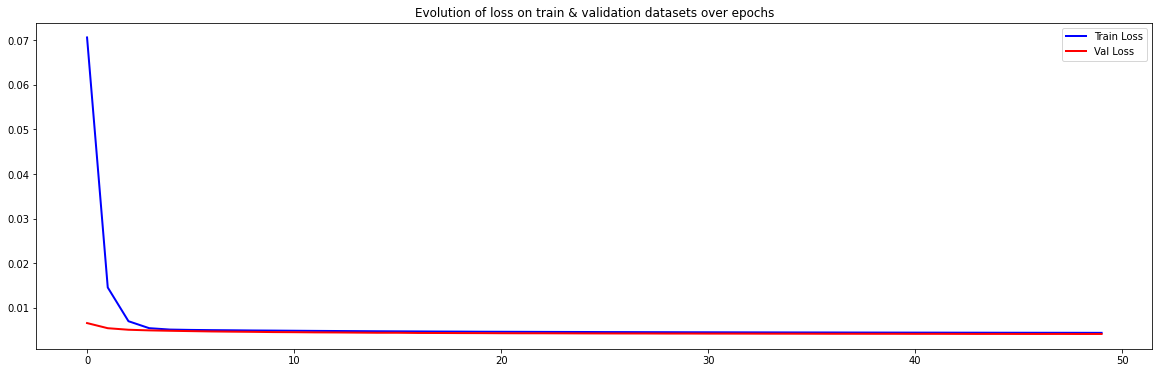

In [28]:
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']

plt.figure(figsize=(20,6))
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of loss on train & validation datasets over epochs')
plt.legend(loc='best')

In [29]:
predictions = model.predict(data_scaled)

In [30]:
predictions = pd.DataFrame(scaler.inverse_transform(predictions), columns=data_scaled.columns, index=data_scaled.index)

In [31]:
predictions.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.178606,1.423762,0.761519,0.558039,0.774662,0.373379,0.605074,0.621079,0.548037,1.503703,...,4.0,4.0,2.0,2.5,2.495379,0.996900,3.500785,3.0,1.999990,2.000111
2,1.814544,0.575889,1.046510,0.504797,0.993728,1.120618,1.096166,0.525179,0.702339,0.680343,...,4.0,4.0,2.0,2.5,2.500409,0.999754,3.500216,3.0,1.999989,2.000184
3,0.692811,0.487313,0.498906,0.481941,0.546141,0.518300,0.560549,0.507465,0.476058,0.515967,...,4.0,4.0,2.0,2.5,2.501999,0.992992,3.499325,3.0,2.000001,1.999892
4,1.624163,1.511411,0.478796,0.443477,0.629854,0.264792,0.525603,0.535303,0.447385,2.668931,...,4.0,4.0,2.0,2.5,2.497498,1.003241,3.500792,3.0,1.999994,2.000133
5,1.256549,0.493535,0.548772,0.581299,0.550053,0.995791,0.717045,0.542549,0.454764,0.579813,...,4.0,4.0,2.0,2.5,2.500802,0.999275,3.499424,3.0,2.000006,2.000318


In [53]:
users = predictions.index

In [56]:
data

MovieID,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71564,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71565,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data[data.isnull()]

MovieID,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
def recommend_for_user(user_item_matrix, content_data, user_id, top_n=10):

    rating = user_item_matrix.loc[user_id].to_frame('PredRating')
    recommendations = (
        rating
            .join(content_data.set_index('MovieID'))
            .join(ratings.set_index('MovieID')[['Rating']])
            .sort_values(by='PredRating', ascending=False)
    )
    if top_n is not None:
        recommendations = recommendations.iloc[:top_n]
        return recommendations[recommendations['Rating'] > 0]
    else:
        return recommendations[recommendations['Rating'] > 0]

In [48]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [49]:
user_id = 4

preds = recommend_for_user(user_item_matrix=predictions, content_data=movies, user_id=user_id, top_n=10)

In [50]:
real = recommend_for_user(user_item_matrix=data, content_data=movies, user_id=user_id, top_n=10)

In [51]:
preds

,PredRating,Title,Genres,Rating
MovieID,,,,
51209,5.000000,Fighting Elegy (Kenka erejii) (1966),Action|Comedy,5.0
64275,5.000000,"Blue Light, The (Das Blaue Licht) (1932)",Drama|Fantasy|Mystery,5.0
33264,5.000000,Satan's Tango (Sátántangó) (1994),Drama,5.0
53355,5.000000,Sun Alley (Sonnenallee) (1999),Comedy|Romance,5.0
42783,5.000000,Shadows of Forgotten Ancestors (1964),Drama|Romance,5.0
33264,5.000000,Satan's Tango (Sátántangó) (1994),Drama,5.0
65001,4.500003,Constantine's Sword (2007),Documentary,4.5
65001,4.500003,Constantine's Sword (2007),Documentary,5.0
63179,4.500000,Tokyo! (2008),Drama,4.5


In [52]:
real

,PredRating,Title,Genres,Rating
MovieID,,,,
590,5.0,Dances with Wolves (1990),Adventure|Drama|Western,4.0
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5.0
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5.0
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,1.0
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,4.0
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.0
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.0
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,4.5
589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi,4.0
